In [197]:
import numpy as np
import pandas as pd
import scipy as sp
import matplotlib.pyplot as plt
import scipy.optimize as sciopt
from scipy.optimize import curve_fit
from scipy.optimize import leastsq

## Question 3

In [198]:
# Reading in .csv Files
lat = np.loadtxt('SpreadingRates.csv', usecols = 0, delimiter=",")
long = np.loadtxt('SpreadingRates.csv', usecols = 1, delimiter=",")
spr_rate = np.loadtxt('SpreadingRates.csv', usecols = 2, delimiter=",")

#Earth Radius
r_earth = 6371 #km

In [199]:
#Creating a function to find Position Vector (r)
def p_vec(theta, phi):
    px = r_earth*np.sin(np.deg2rad(90 - theta))*np.cos(np.deg2rad(phi))
    py = r_earth*np.sin(np.deg2rad(90 - theta))*np.sin(np.deg2rad(phi))
    pz = r_earth*np.cos(np.deg2rad(90 - theta))
    pvec = px, py, pz
    return list(pvec)

In [200]:
#Creating a function to find Euler Pole vector (Question 3b)
def o_vec(theta, phi):
    ox = (np.deg2rad(omega))*np.sin(np.deg2rad(90 - theta))*np.cos(np.deg2rad(phi))
    oy = (np.deg2rad(omega))*np.sin(np.deg2rad(90 - theta))*np.sin(np.deg2rad(phi))
    oz = (np.deg2rad(omega))*np.cos(np.deg2rad(90 - theta))
    ovec = ox, oy, oz
    return np.array(ovec)

In [201]:
#From Part 3b, our Euler Pole had latitude = 13.2, longitude = 38.2, omega = 0.68
omega = 0.68 #deg/Myr
omega_vector = o_vec(13.2, 38.2)
print('Omega_vector =', np.array(omega_vector), 'rad/Myr')

Omega_vector = [0.00908031 0.0071455  0.00271012] rad/Myr


In [202]:
#Finding R vector: use the latitude and longitude values from the .csv file in our position vector funtion
r = p_vec(lat,long)

#Reshape output 
rr = np.reshape(r, (3, 38))
print(rr)
print(len(rr))

[[ 1.93998754e+03  1.80769181e+03  1.76767770e+03  1.75266901e+03
   1.67744491e+03  1.55053155e+03  1.53164694e+03  1.41645596e+03
   1.32618098e+03  1.20356296e+03  1.03405260e+03  1.00113187e+03
   9.35343764e+02  7.23980238e+02  2.88079727e-13 -8.21124457e+00
  -2.09638704e+02 -3.03727577e+02 -4.85239557e+02 -1.42140480e+03
  -1.51765987e+03 -1.66566784e+03 -1.97478031e+03 -2.17304990e+03
  -2.34891014e+03 -2.54401538e+03 -2.66427424e+03 -2.71821199e+03
  -2.72351392e+03 -2.73409287e+03 -2.74937499e+03 -2.82186098e+03
  -2.87158061e+03 -3.00471684e+03 -3.01573358e+03 -2.72372647e+03
  -2.73865627e+03 -2.75732987e+03]
 [ 5.39738816e+03  5.42463721e+03  5.42745689e+03  5.41666909e+03
   5.38565557e+03  5.40734612e+03  5.41272554e+03  5.36107063e+03
   5.27974777e+03  5.25503182e+03  5.12832944e+03  5.05608543e+03
   4.72383119e+03  4.73123204e+03  4.70469898e+03  4.70469181e+03
   4.61660275e+03  4.57283819e+03  4.32600811e+03  3.86326512e+03
   3.79442038e+03  3.74115123e+03  3.6070

In [203]:
# To find theta: use cos theta = omega * r / |omega|*|r| 
# This gives us the theta value so that we can plug later into d = r_earth*theta

#Dot product portion (numerator):
dotprod = (np.dot(omega_vector, rr_yass))
print('w * r = ', dotprod)

#Magnitude of omega * r (denominator):
mag = (np.linalg.norm(omega_vector)*r_earth)
print('|w| * |r| = ', mag)

#Cos theta value:
cos_theta = dotprod/mag
print('cos_theta =', cos_theta)

#Taking the inverse cos to finally get theta:
theta = np.arccos(cos_theta)
print('theta values =', theta)

w * r =  [ 48.66525461  47.56116068  47.16392236  46.8696617   45.68889446
  44.61153688  44.47849738  42.66713312  40.79847815  39.27783265
  36.17996711  35.0700538   30.94248581  28.98528633  21.97480684
  21.90019495  19.19910181  17.92318288  13.89825465   1.52005183
   0.08619272  -1.61905071  -5.34557396  -7.97379777 -10.58527072
 -13.49326364 -15.59604754 -16.22411632 -16.30619208 -16.47031557
 -16.81030642 -17.95488837 -18.85979686 -22.87407102 -26.3866723
 -32.10513594 -32.30250319 -32.60347015]
|w| * |r| =  75.61255011829995
cos_theta = [ 0.64361345  0.62901146  0.62375786  0.61986617  0.60425015  0.59000175
  0.58824226  0.56428639  0.53957284  0.51946182  0.47849156  0.4638126
  0.40922421  0.38333962  0.2906238   0.28963704  0.25391422  0.23703979
  0.18380883  0.02010317  0.00113993 -0.02141246 -0.07069691 -0.10545601
 -0.13999357 -0.1784527  -0.20626268 -0.21456909 -0.21565457 -0.21782516
 -0.22232164 -0.2374591  -0.24942681 -0.30251686 -0.34897213 -0.42460062
 -0.42721

In [204]:
#Now that we have our theta values, the great circle distance (d) can be found through:
d = r_earth*theta
print("d =", d)

d = [ 5552.8748746   5673.47343703  5716.41158262  5748.07028309
  5873.88286939  5987.05371615  6000.92636769  6187.69168359
  6376.52147003  6527.56938869  6828.82184346  6934.84919133
  7321.50652218  7501.13185532  8128.87110217  8135.44035049
  8371.94862117  8482.85058648  8829.80090185  9879.45748358
 10000.28092701 10143.97260735 10458.32947959 10680.65519493
 10902.38168898 11150.58797576 11331.14390796 11385.27613663
 11392.35749627 11406.52302115 11435.89015414 11534.98618176
 11613.59800801 11965.55643444 12278.63957212 12801.35894145
 12819.73921877 12847.81584336]


In [205]:
#To manually calculate our "theoretical" values, we use the expression we derived in Question 3a:
theo_v = np.linalg.norm(omega_vector)*r_earth*np.sin(theta)
print(theo_v)

[57.87011949 58.78089597 59.1001029  59.33373869 60.24767762 61.04972164
 61.14671705 62.42414186 63.66114919 64.61044496 66.39478681 66.98767843
 68.99145097 69.83631514 72.34891568 72.37153582 73.13448041 73.45758811
 74.32426423 75.59726965 75.61250099 75.5952142  75.42335563 75.1909322
 74.86794894 74.39885464 73.98662742 73.85144403 73.83336533 73.79692704
 73.72022337 73.44984492 73.22271367 72.06965111 70.85902384 68.45814767
 68.36523987 68.22222123]


Text(0.5, 1.0, 'Plot of Great Circle Distance VS Velocity/Spreading Rate')

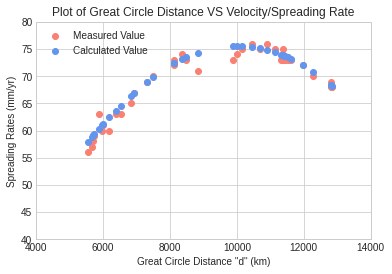

In [206]:
#Now we now have our calculated d values and our theoretical v values, we can now plot them like so:

x = d # our main x-axis
y = spr_rate # Measured Spreading rates as taken from the .csv file
plt.style.use('seaborn-whitegrid')
plt.scatter(x,y, label='Measured Value', color = 'salmon')
plt.scatter(x,theo_v, label='Calculated Value', color = 'cornflowerblue') #Calculated Value
plt.xlim([4000, 14000])
plt.ylim([40, 80])
plt.legend()
plt.xlabel('Great Circle Distance "d" (km)')
plt.ylabel('Spreading Rates (mm/yr)')
plt.title("Plot of Great Circle Distance VS Velocity/Spreading Rate")